#### what is NYC311 data?

- Launched in 2003, NYC311 is an information hub created by the New York City government that provides information on and access to over 3600 non-emergency government services. 

- Originally designed to filter non-emergency calls away from the emergency phone line, 911, NYC311 receives service requests and complaints 24 hours a day, seven days a week, 365 days a year via phone, email, and text in over 175 languages. 

- Service requests can range from inquiries regarding trash collection, voting locations, businesses licensure, and even parking tickets, and complaints can include a wide range of issues including, apartment heating and cooling, street and sidewalk conditions, noisy neighbors and surroundings, and many more.

__Columns__

- __Unique Key__   : Unique identifier of a Service Request (SR) in the open data set
- Created Date : Date SR was created
- Closed Date  : Date SR was closed by responding agency
- __Agency__       : Acronym of responding City Government Agency
- Agency Name  : Full Agency name of responding City Government Agency
- __Complaint Type__ : 

This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.

- Descriptor  : 

This is associated to the Complaint Type, and provides further detail on the incident or condition. Descriptor values are dependent on the Complaint Type, and are not always required in SR.

- Location Type    : Describes the type of location used in the address information
- __Incident Zip__     : Incident location zip code, provided by geo validation.
- Incident Address : House number of incident address provided by submitter.
- Street Name      : Street name of incident address provided by the submitter
- Cross Street 1   : First Cross street based on the geo validated incident location
- Cross Street 2   : Second Cross Street based on the geo validated incident location
- Intersection Street 1 : First intersecting street based on geo validated incident location
- Intersection Street 2 : Second intersecting street based on geo validated incident location
- Address Type : Type of incident location information available.
- __City__         : City of the incident location provided by geovalidation.
- Landmark     : If the incident location is identified as a Landmark the name of the landmark will display here
- Facility Type : 

If available, this field describes the type of city facility associated to the SR
- __Status__   : Status of SR submitted
- Due Date : 

Date when responding agency is expected to update the SR. This is based on the Complaint Type and internal Service Level Agreements (SLAs).

- Resolution Description

Describes the last action taken on the SR by the responding agency. May describe next or future steps.

- Resolution Action Updated Date

Date when responding agency last updated the SR.
- Community Board : Provided by geovalidation.

- BBL : 

__Borough__, Block and Lot, provided by geovalidation. Parcel number to identify the location of location of buildings and properties in NYC.

- Borough : Provided by the submitter and confirmed by geovalidation.
- X Coordinate (State Plane) : Geo validated, X coordinate of the incident location.
- Y Coordinate (State Plane) : Geo validated, Y coordinate of the incident location.
- Open Data Channel Type : 

Indicates how the SR was submitted to 311. i.e. By Phone, Online, Mobile, Other or Unknown.

- Park Facility Name : 

If the incident location is a Parks Dept facility, the Name of the facility will appear here

- Park Borough       : The borough of incident if it is a Parks Dept facility

- Vehicle Type       : If the incident is a taxi, this field describes the type of TLC vehicle.

- Taxi Company Borough

If the incident is identified as a taxi, this field will display the borough of the taxi company.

- Taxi Pick Up Location

If the incident is identified as a taxi, this field displays the taxi pick up location

- Bridge Highway Name

If the incident is identified as a Bridge/Highway, the name will be displayed here.

- Bridge Highway Direction

If the incident is identified as a Bridge/Highway, the direction where the issue took place would be displayed here.

- Road Ramp

If the incident location was Bridge/Highway this column differentiates if the issue was on the Road or the Ramp.

- Bridge Highway Segment

Additional information on the section of the Bridge/Highway were the incident took place.

- Latitude  : Geo based Lat of the incident location
- Longitude : Geo based Long of the incident location
- Location  : Combination of the geo based lat & long of the incident location

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# read the NYC data

In [2]:
location = r"D:\MYLEARN\datasets\311_Service_Requests_from_2010_to_Present.csv"

In [5]:
df = pd.read_csv(location, low_memory=False)

In [7]:
# get the shape of the data table
df.shape

(300698, 53)

In [9]:
# display the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

- the dataset shows quite a few columns are null ('Garage Lot Name ','Ferry Terminal Name') - probably we can drop them

In [10]:
# Setting pandas maximum colummns display so as to view all columns at once.
pd.set_option('display.max_columns', None)

#### Basic data exploratory analysis 
- Explore data
- Find patterns
- Display the complaint type and city together

##### As part of the EDA process, all columns should be explored to identify columns with messy data or nan


In [11]:
# Mix data types
df = pd.read_csv(location)

In [12]:
df_mixed_dt = [df.columns[7],  df.columns[16], df.columns[39], df.columns[40], df.columns[41],
               df.columns[42], df.columns[43], df.columns[44], df.columns[45], df.columns[46], 
               df.columns[47], df.columns[48]]

In [13]:
# Since the datafile has a Unique Key column its better to have that as the index
# Re-read datafile into df pandas dataframe setting unique key as index
df = pd.read_csv(location, index_col='Unique Key', low_memory=False)

In [14]:
# get the total number of rows
print('Number of rows in the data table    : ', df.shape[0])
print('Number of Columns in the data table : ', df.shape[1])

Number of rows in the data table    :  300698
Number of Columns in the data table :  52


In [15]:
# count the null values
df.isnull().sum()

Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough                                0
X Coordinate (St

In [16]:
# Count of non-null values for every column 
df_columns = list(df.columns)
df[df_columns].count()

Created Date                      300698
Closed Date                       298534
Agency                            300698
Agency Name                       300698
Complaint Type                    300698
Descriptor                        294784
Location Type                     300567
Incident Zip                      298083
Incident Address                  256288
Street Name                       256288
Cross Street 1                    251419
Cross Street 2                    250919
Intersection Street 1              43858
Intersection Street 2              43362
Address Type                      297883
City                              298084
Landmark                             349
Facility Type                     298527
Status                            300698
Due Date                          300695
Resolution Description            300698
Resolution Action Updated Date    298511
Community Board                   300698
Borough                           300698
X Coordinate (St

Columns with a lot of missing data won't be useful to the analysis. Also, some columns in the data aren't just useful to this analysis, its best to remove these columns

In [18]:
# A list of columns to remove from the dataframe
df_cols_rmv = ['Incident Address',      'Street Name',           'Cross Street 1', 
               'Cross Street 2',        'Intersection Street 1', 'Intersection Street 2', 
               'Landmark',              'Facility Type',         'Due Date', 
               'Resolution Description','Community Board',       
               'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 
               'Park Facility Name',     'Park Borough',         'School Name',
               'School Number',          'School Region',        'School Code', 
               'School Phone Number',    'School Address',       'School City', 
               'School State',           'School Zip',           'School Not Found', 
               'School or Citywide Complaint',
               'Vehicle Type', 
               'Taxi Company Borough', 
               'Taxi Pick Up Location', 
               'Bridge Highway Name',
               'Bridge Highway Direction', 
               'Road Ramp', 
               'Bridge Highway Segment', 
               'Garage Lot Name',
               'Ferry Direction', 
               'Ferry Terminal Name', 
               'Location', 
               'Address Type', 
               'Agency Name',
               'Resolution Action Updated Date', 
               'Descriptor', 
               'Location Type']

In [19]:
# Remove the columns added to the df_cols_rmv list from df dataframe
df.drop(df_cols_rmv, inplace=True, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Created Date    300698 non-null  object 
 1   Closed Date     298534 non-null  object 
 2   Agency          300698 non-null  object 
 3   Complaint Type  300698 non-null  object 
 4   Incident Zip    298083 non-null  float64
 5   City            298084 non-null  object 
 6   Status          300698 non-null  object 
 7   Borough         300698 non-null  object 
 8   Latitude        297158 non-null  float64
 9   Longitude       297158 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [22]:
df.isnull().sum()

Created Date         0
Closed Date       2164
Agency               0
Complaint Type       0
Incident Zip      2615
City              2614
Status               0
Borough              0
Latitude          3540
Longitude         3540
dtype: int64

In [24]:
# Drop all the null columns
df.dropna(inplace=True, axis = 0)

In [18]:
# investigate df columns with mixed data types
df_mixed_dt

['Location Type',
 'City',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction']

In [337]:
# Drop columns in df-mixed_dt that aren't in df anymore
df_mixed_dt = [x for x in df_mixed_dt if x in list(df.columns)]

In [338]:
df_mixed_dt

['City']

In [19]:
# Explore Incident Zip
df['Incident Zip'].unique()

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462., 11385., 11414., 11213.,
       11375., 11211., 10312., 10017., 11417., 10002., 10027., 11209.,
       10035., 11418., 11421., 11205., 10468., 11355., 11358., 11210.,
       11368., 11427., 11436., 10308., 11364., 10011., 11423., 11230.,
       10003., 11221., 11416., 11378., 11236., 11218., 10029., 10028.,
       11214., 11207., 11369., 11223., 11220., 10302., 11420., 11354.,
       10473., 10301., 11103., 10465., 11377., 11212., 11365., 10472.,
       10452., 11203., 10469., 11237., 11434., 11101., 10460., 11229.,
       11206., 11102., 10466., 10009., 10033., 11694., 10022., 10470.,
       11433., 11428., 11413., 10463., 10471., 10474., 11228., 10014.,
       10475., 11225., 11233., 11370., 11204., 11435., 10459., 11238.,
      

In [25]:
df.isnull().sum()

Created Date      0
Closed Date       0
Agency            0
Complaint Type    0
Incident Zip      0
City              0
Status            0
Borough           0
Latitude          0
Longitude         0
dtype: int64

##### Explore Complaint Type

In [26]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [27]:
df['Agency'].unique()

array(['NYPD'], dtype=object)

In [28]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [29]:
df['Status'].unique()

array(['Closed', 'Open', 'Draft', 'Assigned'], dtype=object)

In [30]:
df['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

#### Columns with messy or missing data


- City - contains some cities in uppercase and others in lowercase
- Borough - contains 'Unspecified' boroughs

In [26]:
# Lets look at the unspecified boroughs, 
# we want to be sure that removing data from df won't cause problems later on
df[df['Borough']=='Unspecified'][['Agency', 'City']]

,Agency,City
Unique Key,,


In [35]:
# the data belongs to NYPD Agency and occurs in Staten Island
# To ensure we don't lose too much data from NYPD, we need to ensure this accounts 
# for a neglegible number of NYPD
nypd_total       = df[df['Agency']=='NYPD']['Borough'].count()
nypd_unspecified = df[(df['Borough']=='Unspecified') & (df['Agency']=="NYPD")]['Borough'].count()

nypd_unspec_perct = nypd_unspecified/nypd_total*100

print("%1.7f"%nypd_unspec_perct)

0.0000000


In [36]:
# Boroughs that are unspecified are negligible that it can be removed
df = df[df['Borough'] != 'Unspecified']

In [37]:
# Number of Status columns with nan
status_nan = len(df[df['Status'].isnull()].index)
print(status_nan)

0


In [32]:
# Since some city values are represented both in uppercase and lowercase, 
# it's better to have the city in the same case
# Convert all City Values to Camel Case
def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan

- python dissect ...

In [39]:
city = 'west bengal'

In [40]:
city.lower().capitalize()

'West bengal'

In [41]:
city.split(' ')

['west', 'bengal']

In [42]:
city = city.split(' ')

In [43]:
' '.join([x.lower().capitalize() for x in city])

'West Bengal'

In [45]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

- back to the main code ...

In [36]:
# Apply camel_case function to City column
df['City'] = df['City'].str.upper()

In [33]:
# Apply camel_case function to City column
df['City'] = df['City'].apply(camel_case)

In [37]:
# Lets view the City values with nan
df[df['City'].isnull()].groupby('Agency')['Status'].count()

Series([], Name: Status, dtype: int64)

In [38]:
df.isnull().sum()

Created Date      0
Closed Date       0
Agency            0
Complaint Type    0
Incident Zip      0
City              0
Status            0
Borough           0
Latitude          0
Longitude         0
dtype: int64

In [39]:
df.dtypes

Created Date       object
Closed Date        object
Agency             object
Complaint Type     object
Incident Zip      float64
City               object
Status             object
Borough            object
Latitude          float64
Longitude         float64
dtype: object

#### date fields

In [194]:
# Created Date and Closed Date aren't in DateTime object. 
# It's convenient when working with DateTime object
# Convert Created Date and Closed Date values to DateTime object.
df.dtypes

Created Date       object
Closed Date        object
Agency             object
Complaint Type     object
Incident Zip      float64
City               object
Status             object
Borough            object
Latitude          float64
Longitude         float64
dtype: object

In [40]:
# first few dates
df[['Created Date', 'Closed Date']].head()

,Created Date,Closed Date
Unique Key,,
32310363,12/31/2015 11:59:45 PM,01-01-16 0:55
32309934,12/31/2015 11:59:44 PM,01-01-16 1:26
32309159,12/31/2015 11:59:29 PM,01-01-16 4:51
32305098,12/31/2015 11:57:46 PM,01-01-16 7:43
32306529,12/31/2015 11:56:58 PM,01-01-16 3:24


- python/pandas dissect ...

In [42]:
data    = {'date':  ['2014-05-01 18:47:05.069722', 
                     '2014-05-01 18:47:05.119994', 
                     '2014-05-02 18:47:05.178768', 
                     '2014-05-02 18:47:05.230071', 
                     '2014-05-02 18:47:05.230071', 
                     '2014-05-02 18:47:05.280592', 
                     '2014-05-03 18:47:05.332662', 
                     '2014-05-03 18:47:05.385109', 
                     '2014-05-04 18:47:05.436523', 
                     '2014-05-04 18:47:05.486877'], 
           'value': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

df_test = pd.DataFrame(data, columns = ['date', 'value'])
print(df_test)

                         date  value
0  2014-05-01 18:47:05.069722      1
1  2014-05-01 18:47:05.119994      1
2  2014-05-02 18:47:05.178768      1
3  2014-05-02 18:47:05.230071      1
4  2014-05-02 18:47:05.230071      1
5  2014-05-02 18:47:05.280592      1
6  2014-05-03 18:47:05.332662      1
7  2014-05-03 18:47:05.385109      1
8  2014-05-04 18:47:05.436523      1
9  2014-05-04 18:47:05.486877      1


In [43]:
df_test['date_converted'] = pd.to_datetime(df_test['date'])
df_test

,date,value,date_converted
0,2014-05-01 18:47:05.069722,1,2014-05-01 18:47:05.069722
1,2014-05-01 18:47:05.119994,1,2014-05-01 18:47:05.119994
2,2014-05-02 18:47:05.178768,1,2014-05-02 18:47:05.178768
3,2014-05-02 18:47:05.230071,1,2014-05-02 18:47:05.230071
4,2014-05-02 18:47:05.230071,1,2014-05-02 18:47:05.230071
5,2014-05-02 18:47:05.280592,1,2014-05-02 18:47:05.280592
6,2014-05-03 18:47:05.332662,1,2014-05-03 18:47:05.332662
7,2014-05-03 18:47:05.385109,1,2014-05-03 18:47:05.385109
8,2014-05-04 18:47:05.436523,1,2014-05-04 18:47:05.436523
9,2014-05-04 18:47:05.486877,1,2014-05-04 18:47:05.486877


In [44]:
df_test.dtypes

date                      object
value                      int64
date_converted    datetime64[ns]
dtype: object

- back to the code ...

In [45]:
df['create_dt_converted'] = pd.to_datetime(df['Created Date'])
df['closed_dt_converted'] = pd.to_datetime(df['Closed Date'])   

In [47]:
df.dtypes

Created Date                   object
Closed Date                    object
Agency                         object
Complaint Type                 object
Incident Zip                  float64
City                           object
Status                         object
Borough                        object
Latitude                      float64
Longitude                     float64
create_dt_converted    datetime64[ns]
closed_dt_converted    datetime64[ns]
dtype: object

In [48]:
df.shape

(297058, 12)

In [49]:
# create a column to compute how long it takes to close a complaint
df['Processing Time'] =  df['closed_dt_converted'] - df['create_dt_converted']

In [50]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,City,Status,Borough,Latitude,Longitude,create_dt_converted,closed_dt_converted,Processing Time
Unique Key,,,,,,,,,,,,,
32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,10034.0,NEW YORK,Closed,MANHATTAN,40.865682,-73.923501,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15
32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,11105.0,ASTORIA,Closed,QUEENS,40.775945,-73.915094,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16
32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,10458.0,BRONX,Closed,BRONX,40.870325,-73.888525,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31
32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,10461.0,BRONX,Closed,BRONX,40.835994,-73.828379,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14
32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,11373.0,ELMHURST,Closed,QUEENS,40.733060,-73.874170,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02


In [51]:
# Viewing the descriptive statistics on the Processing Time can give some insights on 
# turn around time
df['Processing Time'].describe()

count                    297058
mean     0 days 04:18:24.880168
std      0 days 06:03:08.616553
min             0 days 00:01:00
25%             0 days 01:16:29
50%             0 days 02:42:40
75%      0 days 05:20:30.750000
max            24 days 16:52:22
Name: Processing Time, dtype: object

** Observation  **

1. 
2. 
3.


In [205]:
# adding a column to the data to keep track of year and months only

In [52]:
import datetime
df['YYYY-MM'] = df['create_dt_converted'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

In [53]:
# Display the complaint type and city together
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297058 entries, 32310363 to 30281825
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   Created Date         297058 non-null  object         
 1   Closed Date          297058 non-null  object         
 2   Agency               297058 non-null  object         
 3   Complaint Type       297058 non-null  object         
 4   Incident Zip         297058 non-null  float64        
 5   City                 297058 non-null  object         
 6   Status               297058 non-null  object         
 7   Borough              297058 non-null  object         
 8   Latitude             297058 non-null  float64        
 9   Longitude            297058 non-null  float64        
 10  create_dt_converted  297058 non-null  datetime64[ns] 
 11  closed_dt_converted  297058 non-null  datetime64[ns] 
 12  Processing Time      297058 non-null  timedelta64

# Major Observations - 1

In [54]:
df['Complaint Type'].value_counts()

Blocked Driveway             76713
Illegal Parking              74056
Noise - Street/Sidewalk      47756
Noise - Commercial           35149
Derelict Vehicle             17514
Noise - Vehicle              16871
Animal Abuse                  7747
Traffic                       4471
Homeless Encampment           4365
Noise - Park                  3928
Vending                       3775
Drinking                      1271
Noise - House of Worship       922
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      414
Panhandling                    301
Disorderly Youth               285
Illegal Fireworks              163
Graffiti                       113
Squeegee                         4
Name: Complaint Type, dtype: int64

Top-10 ,major complaint types in the dataset are :-

    Blocked Driveway             100492
    Illegal Parking               91091
    Noise - Street/Sidewalk       50800
    Noise - Commercial            43628
    Derelict Vehicle              21427
    Noise - Vehicle               19125
    Animal Abuse                  10503
    Traffic                        5166
    Homeless Encampment            4828
    Vending                        4164
    
 We will apply pandas cross tab to further analyze the data

#### PANDAS CROSSTAB

Example

In [209]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [210]:
# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv(r"D:\MYLEARN\DATASETS\imports-85.data",
                     header=None, 
                     names=headers, 
                     na_values="?" )

# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df_auto = df_raw[df_raw.make.isin(models)].copy()

In [211]:
df_auto.shape

(128, 26)

In [212]:
pd.crosstab(df_auto.make, df_auto.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [213]:
# step 1
df_auto.groupby(['make', 'body_style'])['body_style'].count()

make        body_style 
honda       hatchback       7
            sedan           5
            wagon           1
mazda       hatchback      10
            sedan           7
mitsubishi  hatchback       9
            sedan           4
nissan      hardtop         1
            hatchback       5
            sedan           9
            wagon           3
subaru      hatchback       3
            sedan           5
            wagon           4
toyota      convertible     1
            hardtop         3
            hatchback      14
            sedan          10
            wagon           4
volkswagen  convertible     1
            hatchback       1
            sedan           9
            wagon           1
volvo       sedan           8
            wagon           3
Name: body_style, dtype: int64

In [214]:
# step 2
df_auto.groupby(['make', 'body_style'])['body_style'].count().unstack()

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,7.0,5.0,1.0
mazda,NaN,NaN,10.0,7.0,NaN
mitsubishi,NaN,NaN,9.0,4.0,NaN
nissan,NaN,1.0,5.0,9.0,3.0
subaru,NaN,NaN,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,NaN,1.0,9.0,1.0
volvo,NaN,NaN,NaN,8.0,3.0


In [215]:
# step 3
df_auto.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,7.0,5.0,1.0
mazda,0.0,0.0,10.0,7.0,0.0
mitsubishi,0.0,0.0,9.0,4.0,0.0
nissan,0.0,1.0,5.0,9.0,3.0
subaru,0.0,0.0,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,0.0,1.0,9.0,1.0
volvo,0.0,0.0,0.0,8.0,3.0


In [216]:
pd.crosstab(df_auto.make, df_auto.body_style, margins=True)

body_style,convertible,hardtop,hatchback,sedan,wagon,All
make,,,,,,
honda,0,0,7,5,1,13
mazda,0,0,10,7,0,17
mitsubishi,0,0,9,4,0,13
nissan,0,1,5,9,3,18
subaru,0,0,3,5,4,12
toyota,1,3,14,10,4,32
volkswagen,1,0,1,9,1,12
volvo,0,0,0,8,3,11
All,2,4,49,57,16,128


In [217]:
# data sumarization - percentage of time each combination occurs. 
# This can be accomplished using the normalize parameter:
pd.crosstab(df_auto.make, df_auto.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


- This table shows us that 2.3% of the total population are Toyota hardtops and 6.25% are Volvo sedans.

In [218]:
# The normalize parameter is allows us to perform summary on just the columns or rows. 
# For example, if we want to see how the body styles are distributed across makes:

pd.crosstab(df_auto.make, df_auto.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


- Looking at just the convertible column, you can see that 50% of the convertibles are made by Toyota and the other 50% by Volkswagen.

In [219]:
# We can do the same thing row-wise:

pd.crosstab(df_auto.make, df_auto.body_style, normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


- back to the NYC code

In [55]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Incident Zip', 'City', 'Status', 'Borough', 'Latitude', 'Longitude',
       'create_dt_converted', 'closed_dt_converted', 'Processing Time',
       'YYYY-MM'],
      dtype='object')

In [56]:
pd.crosstab( df.City, df['Complaint Type'])

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,35,27,2,1,1,4,0,58,2,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,15,2734,363,3,35,4,32,4,1278,1543,19,61,499,204,1,1,0,47,9,54
BAYSIDE,37,0,377,198,1,1,3,2,0,513,40,2,3,15,16,0,0,0,9,0,2
BELLEROSE,7,1,95,89,2,1,0,1,1,106,37,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,3,3,0,1,0,0,0,15,4,0,0,1,1,0,0,0,0,0,0
BRONX,1413,20,12744,1949,63,188,9,245,24,7833,2431,79,522,8865,3386,19,17,0,353,51,377
BROOKLYN,2391,110,28136,5167,72,257,43,848,60,27401,11452,338,1538,13317,5146,48,45,0,1081,136,515
CAMBRIA HEIGHTS,11,0,147,115,0,0,0,5,1,76,12,2,0,25,77,0,0,0,6,0,0
CENTRAL PARK,0,0,0,0,0,0,0,0,0,2,0,0,0,95,0,0,0,0,0,0,0


In [57]:
pd.crosstab( df.City, df['Complaint Type'], normalize='index')

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.172727,0.000000,0.159091,0.122727,0.009091,0.004545,0.004545,0.018182,0.000000,0.263636,0.009091,0.050000,0.009091,0.131818,0.031818,0.004545,0.000000,0.000000,0.000000,0.004545,0.004545
ASTORIA,0.017778,0.002133,0.388849,0.051629,0.000427,0.004978,0.000569,0.004551,0.000569,0.181766,0.219457,0.002702,0.008676,0.070971,0.029014,0.000142,0.000142,0.000000,0.006685,0.001280,0.007680
BAYSIDE,0.030353,0.000000,0.309270,0.162428,0.000820,0.000820,0.002461,0.001641,0.000000,0.420837,0.032814,0.001641,0.002461,0.012305,0.013126,0.000000,0.000000,0.000000,0.007383,0.000000,0.001641
BELLEROSE,0.018667,0.002667,0.253333,0.237333,0.005333,0.002667,0.000000,0.002667,0.002667,0.282667,0.098667,0.002667,0.002667,0.034667,0.026667,0.002667,0.002667,0.000000,0.018667,0.002667,0.000000
BREEZY POINT,0.066667,0.000000,0.100000,0.100000,0.000000,0.033333,0.000000,0.000000,0.000000,0.500000,0.133333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRONX,0.034813,0.000493,0.313984,0.048019,0.001552,0.004632,0.000222,0.006036,0.000591,0.192988,0.059895,0.001946,0.012861,0.218414,0.083424,0.000468,0.000419,0.000000,0.008697,0.001257,0.009288
BROOKLYN,0.024373,0.001121,0.286806,0.052670,0.000734,0.002620,0.000438,0.008644,0.000612,0.279314,0.116737,0.003445,0.015678,0.135748,0.052456,0.000489,0.000459,0.000000,0.011019,0.001386,0.005250
CAMBRIA HEIGHTS,0.023061,0.000000,0.308176,0.241090,0.000000,0.000000,0.000000,0.010482,0.002096,0.159329,0.025157,0.004193,0.000000,0.052411,0.161426,0.000000,0.000000,0.000000,0.012579,0.000000,0.000000
CENTRAL PARK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020619,0.000000,0.000000,0.000000,0.979381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Arverne	0.178295 , seems to account for 17% of all the complaints. This city appears to be most troublesome

In [58]:
pd.crosstab( df.City, df['Complaint Type'], normalize='columns')

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.004905,0.000000,0.000456,0.001542,0.007018,0.000787,0.008850,0.000916,0.000000,0.000783,0.000057,0.011931,0.000509,0.000607,0.000415,0.003322,0.000000,0.0,0.000000,0.001689,0.000265
ASTORIA,0.016135,0.036232,0.035639,0.020726,0.010526,0.027537,0.035398,0.007331,0.024540,0.017257,0.043899,0.020607,0.015530,0.010449,0.012092,0.003322,0.001543,0.0,0.010512,0.015203,0.014305
BAYSIDE,0.004776,0.000000,0.004914,0.011305,0.003509,0.000787,0.026549,0.000458,0.000000,0.006927,0.001138,0.002169,0.000764,0.000314,0.000948,0.000000,0.000000,0.0,0.002013,0.000000,0.000530
BELLEROSE,0.000904,0.002415,0.001238,0.005082,0.007018,0.000787,0.000000,0.000229,0.006135,0.001431,0.001053,0.001085,0.000255,0.000272,0.000593,0.003322,0.001543,0.0,0.001566,0.001689,0.000000
BREEZY POINT,0.000258,0.000000,0.000039,0.000171,0.000000,0.000787,0.000000,0.000000,0.000000,0.000203,0.000114,0.000000,0.000000,0.000021,0.000059,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BRONX,0.182393,0.048309,0.166126,0.111282,0.221053,0.147915,0.079646,0.056128,0.147239,0.105771,0.069163,0.085683,0.132892,0.185631,0.200699,0.063123,0.026235,0.0,0.078953,0.086149,0.099868
BROOKLYN,0.308636,0.265700,0.366770,0.295021,0.252632,0.202203,0.380531,0.194273,0.368098,0.370004,0.325813,0.366594,0.391548,0.278855,0.305020,0.159468,0.069444,0.0,0.241780,0.229730,0.136424
CAMBRIA HEIGHTS,0.001420,0.000000,0.001916,0.006566,0.000000,0.000000,0.000000,0.001145,0.006135,0.001026,0.000341,0.002169,0.000000,0.000523,0.004564,0.000000,0.000000,0.0,0.001342,0.000000,0.000000
CENTRAL PARK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000,0.001989,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Top complaint type : Blocked Driveway

    Brooklyn with 36% incidents
    Bronx with 17% incidents
    
    account for 53% of the total 'Blocked Driveway' complaints
    

#### Find major complaint types
- Find the top 10 complaint types 
- Plot a bar graph of count vs. complaint types


In [60]:
df['Complaint Type'].value_counts()[:10]

Blocked Driveway           76713
Illegal Parking            74056
Noise - Street/Sidewalk    47756
Noise - Commercial         35149
Derelict Vehicle           17514
Noise - Vehicle            16871
Animal Abuse                7747
Traffic                     4471
Homeless Encampment         4365
Noise - Park                3928
Name: Complaint Type, dtype: int64

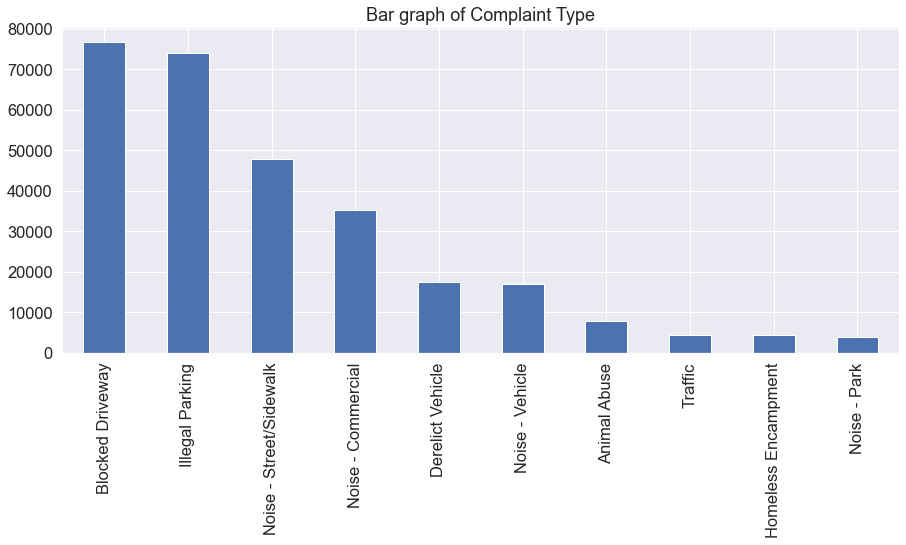

In [61]:
plt.figure(figsize=(15,6))
df['Complaint Type'].value_counts()[:10].plot(kind='bar', 
                                             figsize=(15,6),
                                             title='Bar graph of Complaint Type');

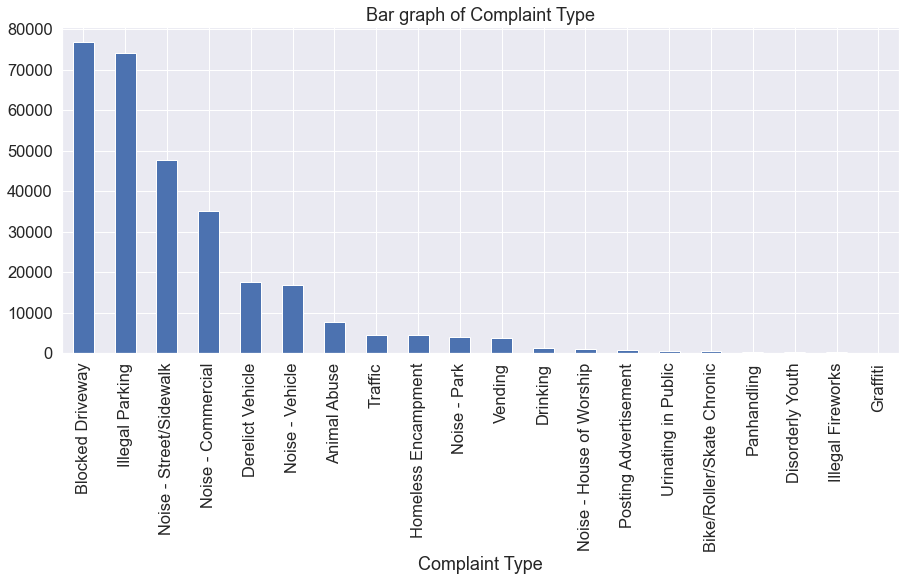

In [62]:
# Visualization of number of complaint type
df.groupby('Complaint Type').size().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,6),
                                                                          title='Bar graph of Complaint Type');

#### Blocked Driveway has the most complaints, lets explore it further

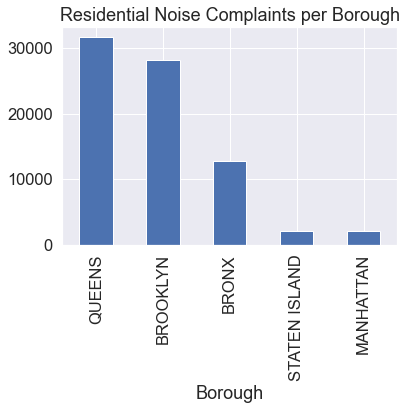

In [63]:
# Borough with the most Blocked Driveway - Residential
df[df['Complaint Type']=='Blocked Driveway'].groupby('Borough').size()[:10].sort_values(ascending=False).plot(kind='bar',
                                                                            title='Residential Noise Complaints per Borough');

- Queens/Brooklyn has the most noise complaints for residential, it would be interesting to know if this noise peaked anytime within the year of if its uniform through the year

In [64]:
queens_noise = df[(df['Borough']=='QUEENS') & (df['Complaint Type']=='Blocked Driveway')]

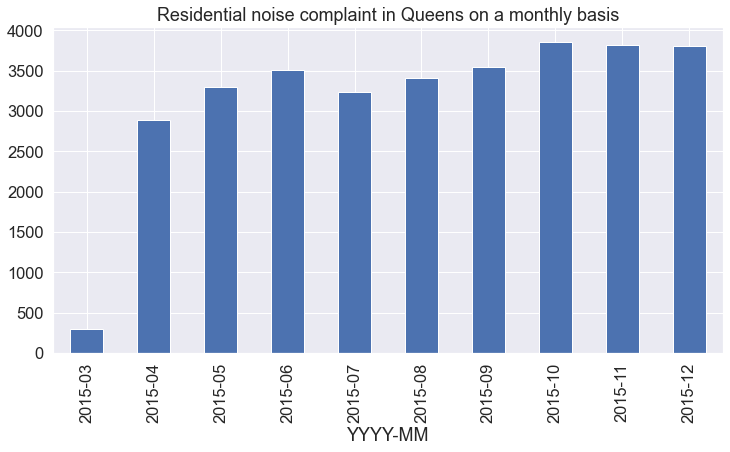

In [65]:
queens_noise.groupby('YYYY-MM').size().plot(kind='bar', figsize=(12,6),
                                             title='Residential noise complaint in Queens on a monthly basis');

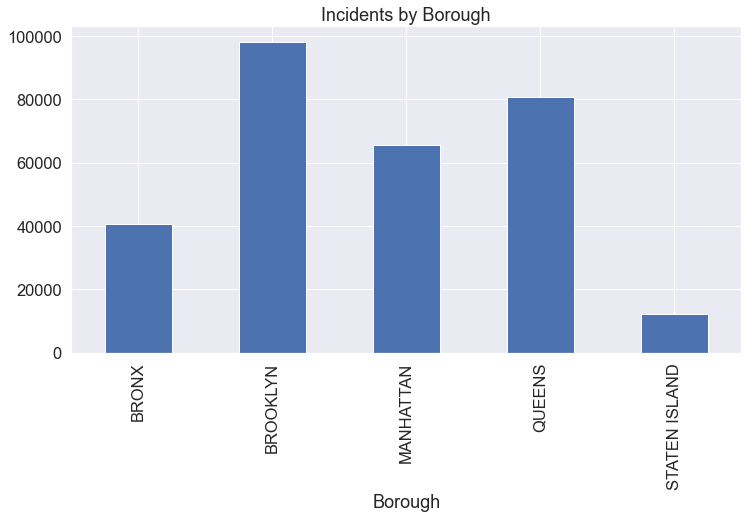

In [66]:
# Exploration of incidents by Borough
borough = df.groupby('Borough')
borough.size().plot(kind='bar', figsize=(12,6), title=('Incidents by Borough'));

From the graph, we can see that Brooklyn has the most incidents, while, Staten Island has the least. It should also be noted that Staten Island is the smallest of the five boroughs so that could be why it has the least incidents.

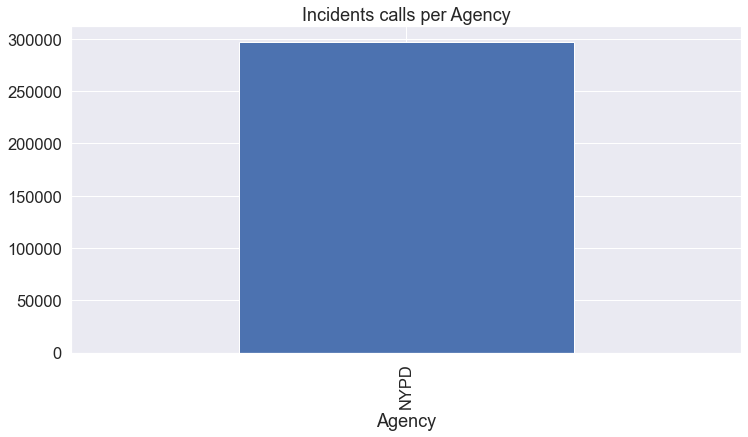

In [67]:
# # Visualization of incidents by Agency
agency = df.groupby('Agency')
agency.size().plot(kind='bar', figsize=(12,6), title=('Incidents calls per Agency'));

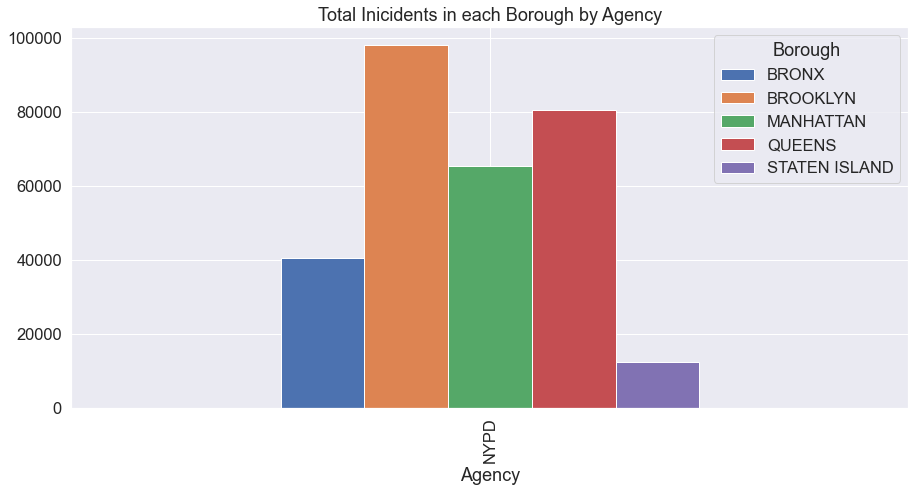

In [68]:
# Visualization of numnber of incidents in each Borough by Agency
agency_borough = df.groupby(['Agency','Borough']).size().unstack()
agency_borough.plot(kind='bar', title='Total Inicidents in each Borough by Agency', figsize=(15,7));

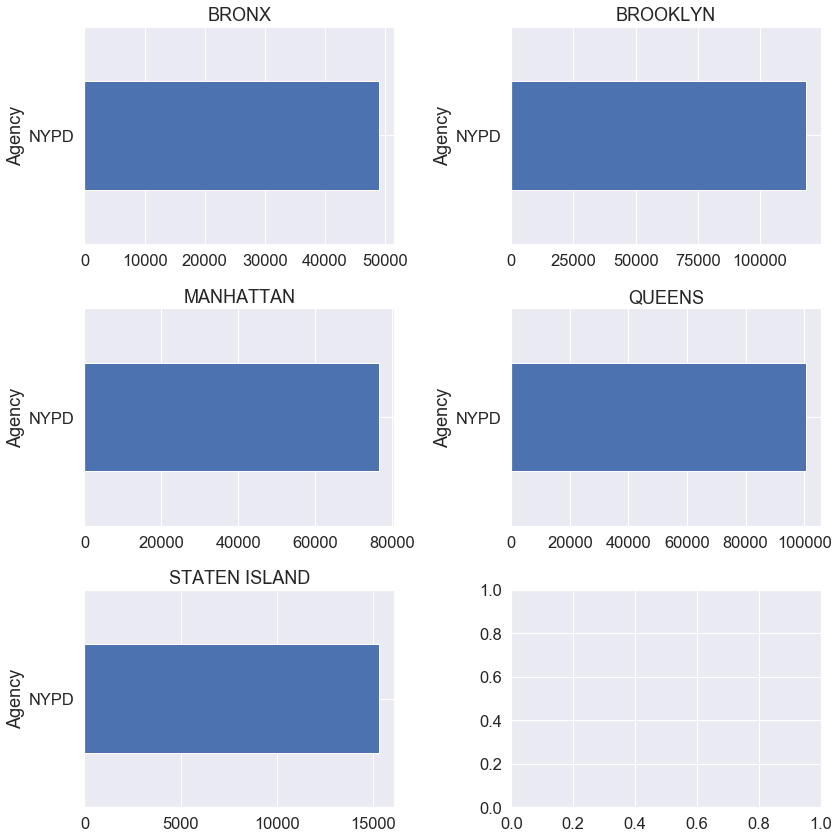

In [233]:
#Visualization of top Agencies with most incidents per borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(agency_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:5]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

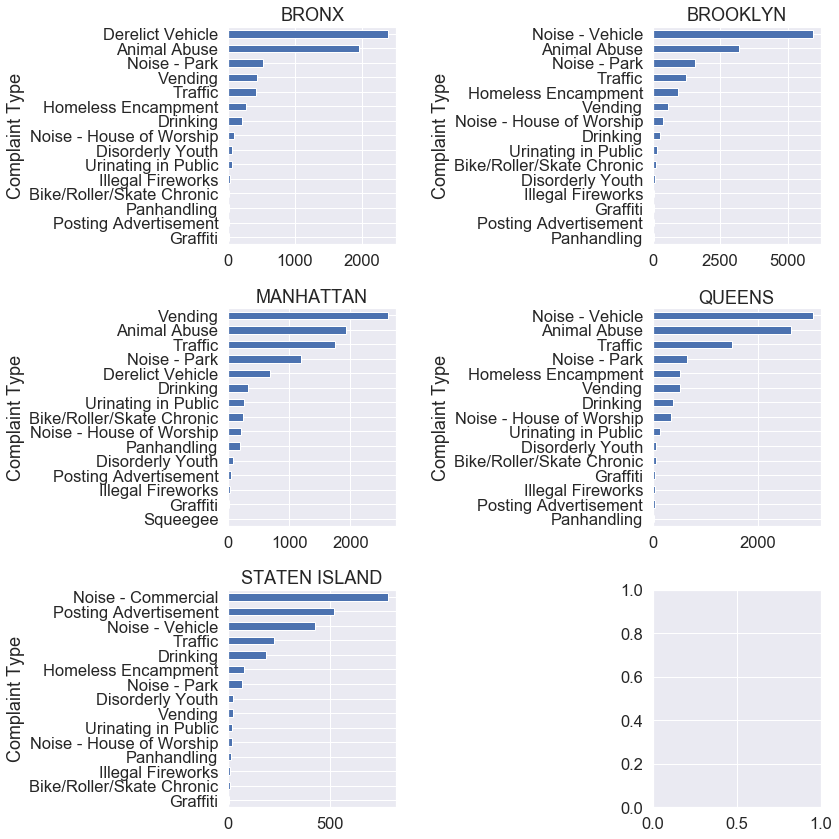

In [234]:
# Visualization of most Complaints per Borough
borough_comp = df.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

#### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [69]:
df.dtypes

Created Date                    object
Closed Date                     object
Agency                          object
Complaint Type                  object
Incident Zip                   float64
City                            object
Status                          object
Borough                         object
Latitude                       float64
Longitude                      float64
create_dt_converted     datetime64[ns]
closed_dt_converted     datetime64[ns]
Processing Time        timedelta64[ns]
YYYY-MM                         object
dtype: object

Here are the date units:

    Code	Meaning	Time span (relative)	Time span (absolute)
    Y	year	+/- 9.2e18 years	[9.2e18 BC, 9.2e18 AD]
    M	month	+/- 7.6e17 years	[7.6e17 BC, 7.6e17 AD]
    W	week	+/- 1.7e17 years	[1.7e17 BC, 1.7e17 AD]
    D	day	+/- 2.5e16 years	[2.5e16 BC, 2.5e16 AD]
    And here are the time units:

Code	Meaning	Time span (relative)	Time span (absolute)

    h	hour	+/- 1.0e15 years	[1.0e15 BC, 1.0e15 AD]
    m	minute	+/- 1.7e13 years	[1.7e13 BC, 1.7e13 AD]
    s	second	+/- 2.9e11 years	[2.9e11 BC, 2.9e11 AD]
    ms	millisecond	+/- 2.9e8 years	[ 2.9e8 BC, 2.9e8 AD]
    us	microsecond	+/- 2.9e5 years	[290301 BC, 294241 AD]
    ns	nanosecond	+/- 292 years	[ 1678 AD, 2262 AD]
    ps	picosecond	+/- 106 days	[ 1969 AD, 1970 AD]
    fs	femtosecond	+/- 2.6 hours	[ 1969 AD, 1970 AD]
    as	attosecond	+/- 9.2 seconds	[ 1969 AD, 1970 AD]

In [70]:
df['response_time'] = df['Processing Time']/ np.timedelta64(1, 'm')

In [71]:
df.response_time.describe()

count    297058.000000
mean        258.414669
std         363.143609
min           1.000000
25%          76.483333
50%         162.666667
75%         320.512500
max       35572.366667
Name: response_time, dtype: float64

#### Visualization on processing time.

In [253]:
# df['Processing Time Float'] = df['Processing Time'].apply(lambda x:x/np.timedelta64(1, 'D'))

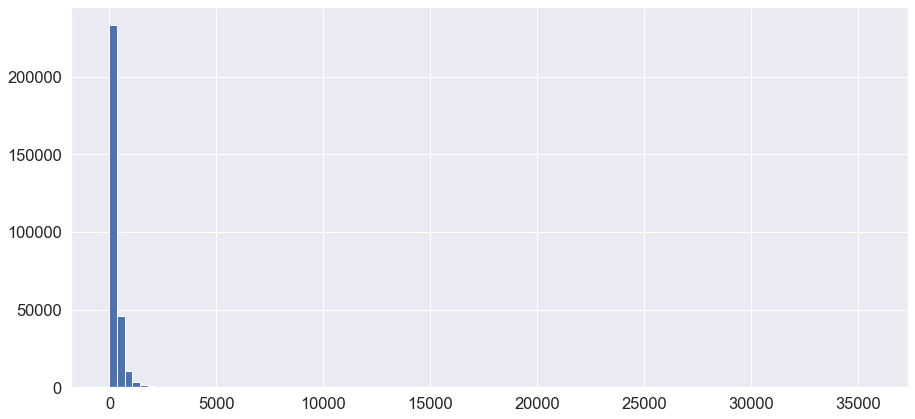

In [72]:
# Histogram of Processing Time
df['response_time'].hist(bins=100, figsize=(15,7));

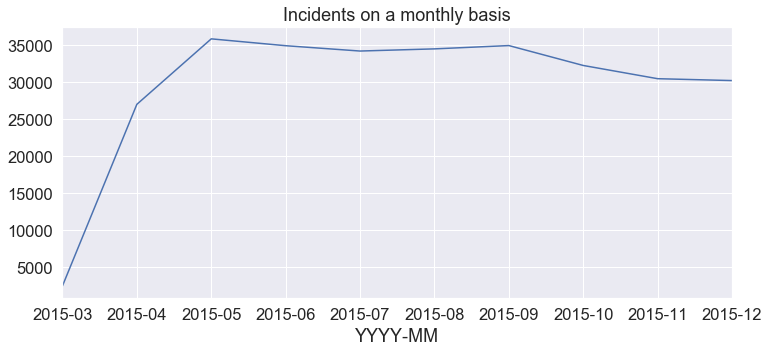

In [73]:
#Incidents on a monthly basis
monthly_incidents =  df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

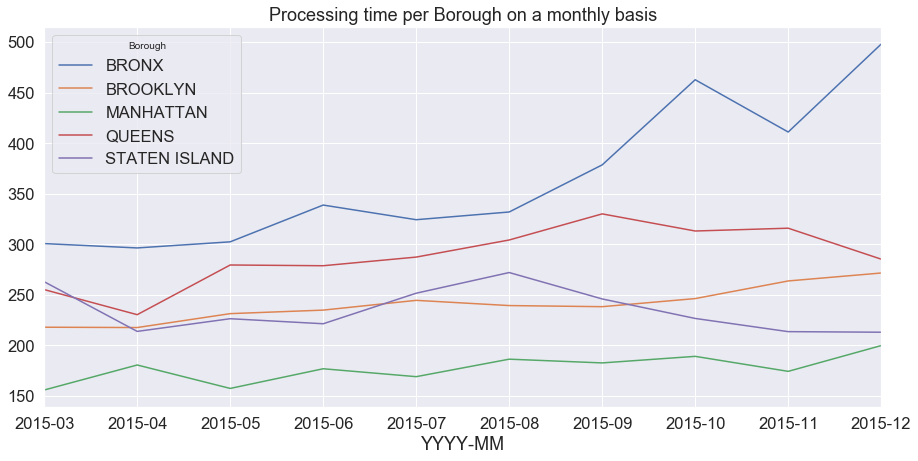

In [74]:
# Boroughs with Processing Time on a monthly basis
df.groupby(['YYYY-MM','Borough'])['response_time'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

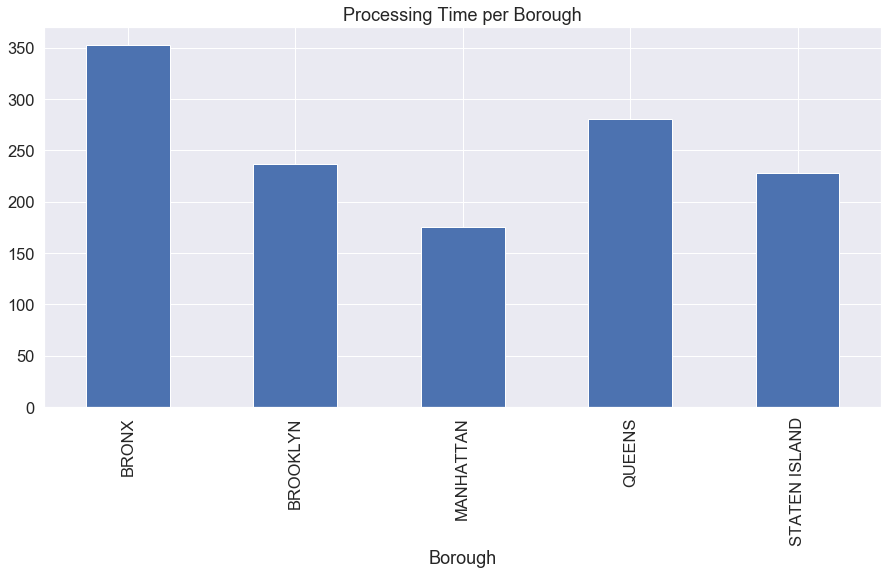

In [260]:
# Processing time per Borough
df.groupby('Borough')['response_time'].mean().plot(kind='bar', figsize=(15,7),
                                                          title='Processing Time per Borough');

In [262]:
df.dtypes

Created Date                    object
Closed Date                     object
Agency                          object
Complaint Type                  object
Incident Zip                   float64
City                            object
Status                          object
Borough                         object
Latitude                       float64
Longitude                      float64
create_dt_converted     datetime64[ns]
closed_dt_converted     datetime64[ns]
Processing Time        timedelta64[ns]
YYYY-MM                         object
response_time                  float64
dtype: object

#### Group by complaint type, show the response time

In [75]:
# sort the ratings in the descending order of their average ratings:
df.groupby('Complaint Type')['response_time'].mean().sort_values(ascending=False)

Complaint Type
Derelict Vehicle             440.806599
Graffiti                     429.075074
Animal Abuse                 313.084009
Blocked Driveway             284.268343
Illegal Parking              269.029318
Panhandling                  263.373810
Homeless Encampment          262.434330
Squeegee                     242.737500
Vending                      240.687435
Drinking                     231.395974
Bike/Roller/Skate Chronic    222.129469
Urinating in Public          217.599859
Noise - Vehicle              215.890730
Disorderly Youth             214.128889
Traffic                      206.964613
Noise - Street/Sidewalk      206.525132
Noise - Park                 204.266807
Noise - House of Worship     191.747777
Noise - Commercial           188.224119
Illegal Fireworks            165.726483
Posting Advertisement        118.548200
Name: response_time, dtype: float64

#### Validate the response times for any 2 groups is uniform/same 
(use t-test to validate)

    Whether the average response time across complaint types is similar or not (overall)
    Are the type of complaint or service requested and location related?

In [76]:
from scipy import stats

In [77]:
# Showing descriptive statistics from pandas.describe()
df.groupby("Complaint Type")['response_time'].describe()

,count,mean,std,min,25%,50%,75%,max
Complaint Type,,,,,,,,
Animal Abuse,7747.0,313.084009,517.847430,3.883333,98.441667,198.000000,384.500000,31156.016667
Bike/Roller/Skate Chronic,414.0,222.129469,252.569070,4.000000,62.266667,144.041667,299.750000,2034.866667
Blocked Driveway,76713.0,284.268343,334.268790,2.850000,96.000000,189.816667,358.000000,8897.000000
Derelict Vehicle,17514.0,440.806599,664.176179,3.000000,102.637500,246.333333,512.291667,13402.200000
Disorderly Youth,285.0,214.128889,224.008425,6.050000,75.533333,153.016667,276.650000,1683.450000
Drinking,1271.0,231.395974,312.278475,4.933333,72.808333,153.000000,292.958333,5686.000000
Graffiti,113.0,429.075074,530.965508,9.383333,147.266667,272.000000,490.950000,3276.716667
Homeless Encampment,4365.0,262.434330,324.841225,5.000000,81.783333,171.000000,334.183333,5478.733333
Illegal Fireworks,163.0,165.726483,214.742403,8.100000,32.533333,84.000000,223.091667,1671.166667


In [78]:
# create 2 data frames that are subsets of the original data where each data frame
# only contains data for a respective flower species
ct1 = df[(df['Complaint Type']     == 'Blocked Driveway')]
ct1.reset_index(inplace= True)

ct2 = df[(df['Complaint Type']     == 'Illegal Parking')]
ct2.reset_index(inplace= True)

In [79]:
ct1.shape, ct2.shape

((76713, 17), (74056, 17))

In [80]:
stats.ttest_ind(ct1['response_time'], ct2['response_time'])[1]

1.1861122965163154e-17

In [82]:
p = stats.ttest_ind(ct1['response_time'], ct2['response_time'])[1]
p

1.1861122965163154e-17

In [346]:
# interpret via p-value
alpha = .05
if p > alpha:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')

Accept null hypothesis --> the means are equal.


# check for uniform response time, for all the complaint types

In [83]:
# sort the ratings in the descending order of their average ratings:
all_ct = df.groupby('Complaint Type')['response_time'].mean().sort_values(ascending=False)

In [84]:
all_ct_df = pd.DataFrame(all_ct).reset_index()
all_ct_df

,Complaint Type,response_time
0,Derelict Vehicle,440.806599
1,Graffiti,429.075074
2,Animal Abuse,313.084009
3,Blocked Driveway,284.268343
4,Illegal Parking,269.029318
5,Panhandling,263.373810
6,Homeless Encampment,262.434330
7,Squeegee,242.737500
8,Vending,240.687435
9,Drinking,231.395974


In [85]:
ct_names = all_ct_df['Complaint Type'].values
ct_names

array(['Derelict Vehicle', 'Graffiti', 'Animal Abuse', 'Blocked Driveway',
       'Illegal Parking', 'Panhandling', 'Homeless Encampment',
       'Squeegee', 'Vending', 'Drinking', 'Bike/Roller/Skate Chronic',
       'Urinating in Public', 'Noise - Vehicle', 'Disorderly Youth',
       'Traffic', 'Noise - Street/Sidewalk', 'Noise - Park',
       'Noise - House of Worship', 'Noise - Commercial',
       'Illegal Fireworks', 'Posting Advertisement'], dtype=object)

In [86]:
no_ct_names = len(ct_names)
alpha       = .05


In [302]:
means_are_equal_ctr     = 0
means_are_not_equal_ctr = 0
total_ctr               = 0

for ct_name_ctr in range(no_ct_names):
    ct_type1 = ct_names[ct_name_ctr]
    
    inner_ct_names = ct_names[ct_name_ctr+1:]
    
    no_inner_ct_names = len(inner_ct_names)
    
    for inner_ctr in range(no_inner_ct_names):
        
        ct_type2 = inner_ct_names[inner_ctr]

        # create 2 data frames that are subsets of the original data where each data frame
        # only contains data for a respective flower species
        ct1 = df[(df['Complaint Type']     == ct_type1)]
        ct1.reset_index(inplace= True)

        ct2 = df[(df['Complaint Type']     == ct_type2)]
        ct2.reset_index(inplace= True)

        p = stats.ttest_ind(ct1['response_time'], ct2['response_time'])[1]

        # interpret via p-value
        if p > alpha:
            print('ACCRPT H0, {:20s}, {:20s} --> the means are equal.'.format(ct_type1, ct_type2))
            means_are_equal_ctr = means_are_equal_ctr + 1
        else:
            print('REJECT H0, {:20s}, {:20s} --> the means are NOT equal.'.format(ct_type1, ct_type2))
            means_are_not_equal_ctr = means_are_not_equal_ctr + 1
        
        total_ctr = total_ctr + 1
        

print('Out of {} combinations, {} equal, {} not equal'.format(total_ctr, means_are_equal_ctr, means_are_not_equal_ctr  ))

ACCRPT H0, Derelict Vehicle    , Graffiti             --> the means are equal.
REJECT H0, Derelict Vehicle    , Animal Abuse         --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Blocked Driveway     --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Panhandling          --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Illegal Parking      --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Homeless Encampment  --> the means are NOT equal.
ACCRPT H0, Derelict Vehicle    , Squeegee             --> the means are equal.
REJECT H0, Derelict Vehicle    , Vending              --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Drinking             --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Urinating in Public  --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Bike/Roller/Skate Chronic --> the means are NOT equal.
REJECT H0, Derelict Vehicle    , Noise - Vehicle      --> the means are NOT equal.
REJECT 

#### Test for same mean across all the complaint types, (use ANOVA)

In [87]:
ct_names

array(['Derelict Vehicle', 'Graffiti', 'Animal Abuse', 'Blocked Driveway',
       'Illegal Parking', 'Panhandling', 'Homeless Encampment',
       'Squeegee', 'Vending', 'Drinking', 'Bike/Roller/Skate Chronic',
       'Urinating in Public', 'Noise - Vehicle', 'Disorderly Youth',
       'Traffic', 'Noise - Street/Sidewalk', 'Noise - Park',
       'Noise - House of Worship', 'Noise - Commercial',
       'Illegal Fireworks', 'Posting Advertisement'], dtype=object)

In [88]:
ct1 = df[(df['Complaint Type']     == 'Derelict Vehicle')]
ct2 = df[(df['Complaint Type']     == 'Graffiti')]
ct3 = df[(df['Complaint Type']     == 'Animal Abuse')]
ct4 = df[(df['Complaint Type']     == 'Blocked Driveway')]
ct5 = df[(df['Complaint Type']     == 'Panhandling')]
ct6 = df[(df['Complaint Type']     == 'Illegal Parking')]
ct7 = df[(df['Complaint Type']     == 'Homeless Encampment')]
ct8 = df[(df['Complaint Type']     == 'Squeegee')]
ct10 = df[(df['Complaint Type']     == 'Vending')]
ct11 = df[(df['Complaint Type']     == 'Drinking')]
ct12 = df[(df['Complaint Type']     == 'Urinating in Public')]
ct13 = df[(df['Complaint Type']     == 'Bike/Roller/Skate Chronic')]
ct14 = df[(df['Complaint Type']     == 'Noise - Vehicle')]
ct15 = df[(df['Complaint Type']     == 'Disorderly Youth')]
ct16 = df[(df['Complaint Type']     == 'Traffic')]
ct17 = df[(df['Complaint Type']     == 'Noise - Street/Sidewalk')]


In [89]:
# Perform the ANOVA
stats.f_oneway(ct1['response_time'], ct2['response_time'], ct3['response_time'], 
               ct4['response_time'], ct5['response_time'], ct6['response_time'],
               ct7['response_time'], ct8['response_time'], 
               ct10['response_time'], ct11['response_time'], ct12['response_time'],
               ct13['response_time'], ct14['response_time'], ct15['response_time'],
               ct16['response_time'], ct17['response_time'])

F_onewayResult(statistic=388.552647975335, pvalue=0.0)

# Are the type of complaint or service requested and location related?

we are interested in knowing if there is a relationship between 'complaint type' and 'location' of the complaint. 

In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

> - $H_0$: There is no statistically significant relationship between 'complaint type' and the 'location'

> - $H_a$: There is a statistically significant relationship between 'complaint type' and the 'location'

In [311]:
df.columns


Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Incident Zip', 'City', 'Status', 'Borough', 'Latitude', 'Longitude',
       'create_dt_converted', 'closed_dt_converted', 'Processing Time',
       'YYYY-MM', 'response_time'],
      dtype='object')

In [314]:
df_observed = pd.crosstab(
    df['Complaint Type'],
    df['City'],
    margins = True
)

City,Arverne,Astoria,Bayside,Bellerose,Breezy Point,Bronx,Brooklyn,Cambria Heights,Central Park,College Point,Corona,East Elmhurst,Elmhurst,Far Rockaway,Floral Park,Flushing,Forest Hills,Fresh Meadows,Glen Oaks,Hollis,Howard Beach,Jackson Heights,Jamaica,Kew Gardens,Little Neck,Long Island City,Maspeth,Middle Village,New Hyde Park,New York,Oakland Gardens,Ozone Park,Queens,Queens Village,Rego Park,Richmond Hill,Ridgewood,Rockaway Park,Rosedale,Saint Albans,South Ozone Park,South Richmond Hill,Springfield Gardens,Staten Island,Sunnyside,Whitestone,Woodhaven,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,46,170,53,15,2,1967,3186,15,0,35,104,85,59,111,7,191,78,66,5,39,50,50,317,26,21,40,56,35,1,1926,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,43,57,111,10503
Bike/Roller/Skate Chronic,0,16,0,1,0,22,121,0,0,0,0,1,2,0,0,3,6,0,0,0,1,2,3,0,0,3,1,1,0,249,2,1,0,0,0,0,3,0,1,0,1,1,0,9,2,4,2,5,463
Blocked Driveway,50,3595,514,138,3,17052,36431,177,0,597,3597,1925,1992,383,33,3640,873,682,48,442,216,703,3619,429,174,1107,1000,663,76,2687,177,1681,3,772,780,1099,2160,80,270,318,1202,1945,330,2844,278,279,1363,2065,100492
Derelict Vehicle,32,440,231,120,3,2399,6245,148,0,223,72,138,94,215,74,531,71,346,57,162,172,41,1132,16,73,223,510,366,14,688,117,479,2,478,93,200,507,19,247,248,425,356,267,2182,17,279,369,306,21427
Disorderly Youth,2,5,2,2,0,66,79,0,0,1,6,1,2,1,1,2,1,0,0,1,1,0,9,0,2,2,2,0,0,80,1,4,0,0,0,0,3,4,0,1,2,2,0,25,2,1,0,1,314
Drinking,1,43,1,1,1,206,291,0,0,1,34,9,13,4,1,47,1,2,0,3,4,10,40,1,1,8,9,2,0,320,2,20,0,5,4,10,10,23,2,3,14,25,6,188,12,3,4,15,1400
Graffiti,1,4,3,0,0,15,60,0,0,2,4,3,1,0,0,6,3,0,0,0,0,1,3,0,0,3,1,0,0,25,0,0,0,1,1,1,3,0,2,0,2,0,0,6,1,1,0,4,157
Homeless Encampment,4,32,2,1,0,273,939,6,0,3,26,2,34,16,0,26,18,6,0,9,3,11,93,5,0,10,11,5,0,3021,1,8,2,19,6,30,26,4,4,11,5,12,7,77,12,0,10,38,4828
Illegal Fireworks,0,4,0,1,0,24,60,1,0,0,0,0,1,0,0,2,1,0,0,0,4,1,4,0,0,0,1,0,0,34,0,1,0,5,0,4,2,0,0,0,1,2,1,11,0,1,0,1,167


In [318]:
chi2, p, dof, expected = stats.chi2_contingency(df_observed.values)

result = ""

if p < alpha:
    print('H0 rejected, there is relationship between complaint type and City')
else:
    print('H0 accepted, there is NO relationship between complaint type and City')


H0 rejected, there is relationship between complaint type and City
